In [18]:
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
log_files = !find ../logs -name "short*"

In [20]:
log_files

['../logs/short_logs_nu100_ng50.json',
 '../logs/short_logs_nu20_ng50.json',
 '../logs/short_logs_nu50_ng50.json']

In [21]:
df_nu100_ng50 = pd.read_json('../logs/short_logs_nu100_ng50.json')
df_nu20_ng50 = pd.read_json('../logs/short_logs_nu20_ng50.json')
df_nu50_ng50 = pd.read_json('../logs/short_logs_nu50_ng50.json')

In [23]:
df_nu50_ng50.shape

(50, 6)

In [24]:
df_nu50_ng50.head(2)

,round,mean_result,explored_moves,last_result,10-games-mean,elapsed_time
0,1,0.0,0,0.5,0.0,4.759
1,2,0.5,11710,0.5,0.5,6.642


In [25]:
df_nu100_ng50.head(2)

,round,mean_result,explored_moves,last_result,10-games-mean,elapsed_time
0,1,0.0,0,0.5,0.0,8.225
1,2,0.5,21480,0.5,0.5,11.636


In [27]:
df_nu20_ng50.head(2)

,round,mean_result,explored_moves,last_result,10-games-mean,elapsed_time
0,1,0.0,0,0.5,0.0,2.021
1,2,0.5,5660,0.5,0.5,4.850


In [30]:
df_nu100_ng50.isna().sum()

round              0
mean_result        0
explored_moves     0
last_result        0
10-games-mean      0
elapsed_time      19
dtype: int64

### Results

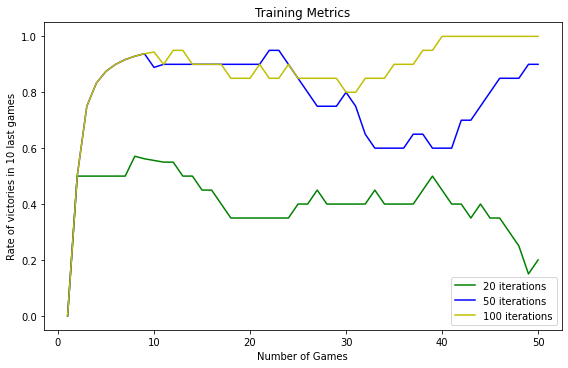

In [42]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Number of Games')

ax1.plot(df_nu20_ng50["round"].values, df_nu20_ng50["10-games-mean"].values, 'g-', label='20 iterations')
ax1.plot(df_nu50_ng50["round"].values, df_nu50_ng50["10-games-mean"].values, 'b-', label='50 iterations')
ax1.plot(df_nu100_ng50["round"].values, df_nu100_ng50["10-games-mean"].values, 'y-', label='100 iterations')

ax1.tick_params(axis='y')#, labelcolor=color)
#ax1.set_ylim([1.8, 3.9])
ax1.set_ylabel('Rate of victories in 10 last games')
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Training Metrics')
plt.show()

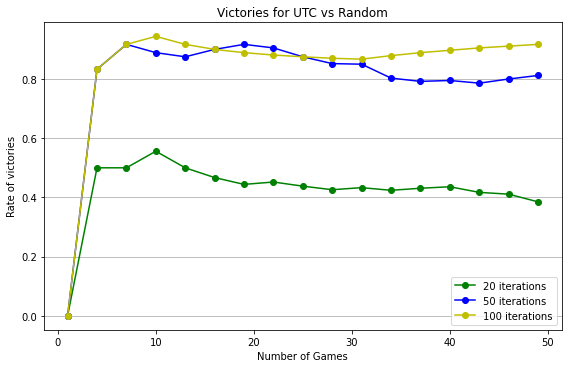

In [72]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Number of Games')

ax1.plot(df_nu20_ng50["round"].values[::3], df_nu20_ng50.mean_result.values[::3], 'go-', label='20 iterations')
ax1.plot(df_nu50_ng50["round"].values[::3], df_nu50_ng50.mean_result.values[::3], 'bo-', label='50 iterations')
ax1.plot(df_nu100_ng50["round"].values[::3], df_nu100_ng50.mean_result.values[::3], 'yo-', label='100 iterations')

ax1.tick_params(axis='y')#, labelcolor=color)
#ax1.set_ylim([1.8, 3.9])
ax1.set_ylabel('Rate of victories')
ax1.legend()
ax1.grid(axis='y')

#ax2 = ax1.twinx()
#ax2.plot(df_nu20_ng50.dropna()["round"].values[::3], df_nu20_ng50.dropna().elapsed_time.values[::3], 'gv--', label='20 iterations')
#ax2.plot(df_nu50_ng50.dropna()["round"].values[::3], df_nu50_ng50.dropna().elapsed_time.values[::3], 'bv--', label='50 iterations')
#ax2.plot(df_nu100_ng50.dropna()["round"].values[::3], df_nu100_ng50.dropna().elapsed_time.values[::3], 'yv--', label='100 iterations')

#ax2.tick_params(axis='y')#, labelcolor=color)
#ax2.set_ylabel('Elapsed time')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Victories for UTC vs Random')
plt.show()

### Elapsed time

In [47]:
with_time_20 = df_nu20_ng50.dropna()

In [49]:
with_time_20.shape

(49, 6)

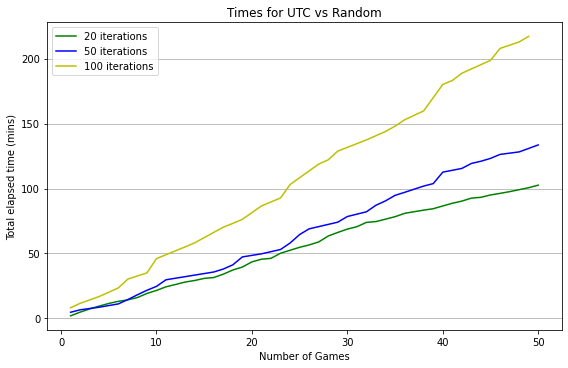

In [73]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Number of Games')

ax1.plot(df_nu20_ng50.dropna()["round"].values, df_nu20_ng50.dropna().elapsed_time.values, 'g-', label='20 iterations')
ax1.plot(df_nu50_ng50.dropna()["round"].values, df_nu50_ng50.dropna().elapsed_time.values, 'b-', label='50 iterations')
ax1.plot(df_nu100_ng50.dropna()["round"].values, df_nu100_ng50.dropna().elapsed_time.values, 'y-', label='100 iterations')

ax1.tick_params(axis='y')#, labelcolor=color)
#ax1.set_ylim([1.8, 3.9])
ax1.set_ylabel('Total elapsed time (mins)')
ax1.legend()
ax1.grid(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Times for UTC vs Random')
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Epoch')

ax1.plot(epochs[indices_to_plot], loss[indices_to_plot], 'go-', label='loss')
ax1.plot(epochs[indices_to_plot], policy_loss[indices_to_plot], 'bo-', label='policy loss')
ax1.tick_params(axis='y')#, labelcolor=color)
ax1.set_ylim([1.8, 3.9])
ax1.set_ylabel('Continue Lines')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(epochs[indices_to_plot], policy_categorical_accuracy[indices_to_plot], 'kv--', label='policy acc')
ax2.plot(epochs[indices_to_plot], value_loss[indices_to_plot], 'rv--', label='value loss')
ax2.plot(epochs[indices_to_plot], mean_rse[indices_to_plot], 'cv--', label='mean RSE')
ax2.tick_params(axis='y')#, labelcolor=color)
ax2.set_ylim([0., 1.])
ax2.set_ylabel('Dashed Lines')
ax2.legend()
ax2.grid(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Training Metrics')
plt.show()